### Stretch of road with a stoplight

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [51]:
# Functions:

def rho_green_light(nx, rho_light):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """    
    rho = numpy.arange(nx)*2./nx*rho_light # Before stoplight
    rho[int((nx-1)/2):] = 0
    return rho

def computeF(u_max, rho_max, rho):
    """Computes flux F=V*rho

    Parameters
    ----------
    u_max  : float
        Maximum allowed velocity
    rho    : array of floats
        Array with density of cars at every point x
    rho_max: float
        Maximum allowed car density
        
    Returns
    -------
    F : array
        Array with flux at every point x
    """
    return u_max*rho*(1-rho/rho_max)

def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    # initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))
    # copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:] - F[:-1])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()
        
    return rho_n

def ftfs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, forward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    # initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))
    # copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,:-1] = rho[:-1] - dt/dx*(F[1:] - F[:-1])
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()
        
    return rho_n

def my_green_light(nx, x, rho_light, rho_max):
    rho = x*rho_light/2+rho_max/2
    rho[int((nx-1)/2):] = rho_max/2
    return rho

In [31]:
h[-1]

5

In [3]:
# Initial condition paramters
# defining grid size and time steps

nx = 81
nt = 30
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.

rho = rho_green_light(nx, rho_light)

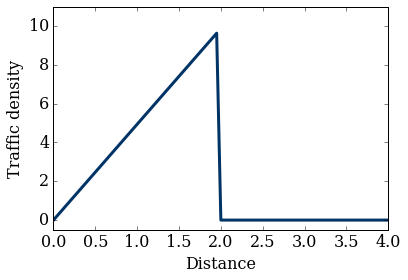

In [4]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5, 11.);

In [5]:
# calculate solution:
sigma = 1.
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

In [6]:
# animate solution:
from matplotlib import animation
from IPython.display import HTML

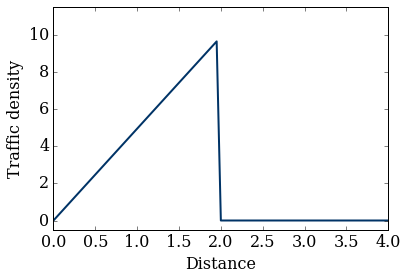

In [7]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-0.5,11.5),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)                 

In [8]:
HTML(anim.to_html5_video())

### Trying initial conditions that wont blow up:

In [9]:
rho_light = 5.
nt = 40
rho = rho_green_light(nx, rho_light)
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())

### Trying forward in time, forward in space

I am not understanding how to do this. To be stable for a forward space scheme, you need to have the wavespeed be negative for all x. This requires all rho to be greater than half of rho_max. I also don't know if the function for ftfs is right. the scheme looks almost identical to ftbs I don't know how to make it happen with array ops.

In [52]:
nt = 40
rho = my_green_light(nx, x, rho_light, rho_max)
rho_n = ftfs(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())

In [49]:
my_green_light(nx, x, rho_light, rho_max)


array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ,
        1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,  2.4 ,  2.55,
        2.7 ,  2.85,  3.  ,  3.15,  3.3 ,  3.45,  3.6 ,  3.75,  3.9 ,
        4.05,  4.2 ,  4.35,  4.5 ,  4.65,  4.8 ,  4.95,  5.1 ,  5.25,
        5.4 ,  5.55,  5.7 ,  5.85,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,
        5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,
        5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,
        5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,
        5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ])